In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE,f_regression, SelectKBest
from sklearn.linear_model import Ridge


In [44]:
df=pd.read_csv("/content/drive/MyDrive/AI assesment/BIKE DETAILS.csv")

In [45]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [46]:
df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [48]:
df.shape

(1061, 7)

In [49]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,1061.0,59638.151744,56304.291973,5000.0,28000.0,45000.0,70000.0,760000.0
year,1061.0,2013.867107,4.301191,1988.0,2011.0,2015.0,2017.0,2020.0
km_driven,1061.0,34359.833176,51623.152702,350.0,13500.0,25000.0,43000.0,880000.0
ex_showroom_price,626.0,87958.714058,77496.587189,30490.0,54852.0,72752.5,87031.5,1278000.0


In [51]:
df.describe(include="object").T

,count,unique,top,freq
name,1061,279,Bajaj Pulsar 150,41
seller_type,1061,2,Individual,1055
owner,1061,4,1st owner,924


In [52]:
#Missing Values
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [53]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1056,False
1057,False
1058,False
1059,False


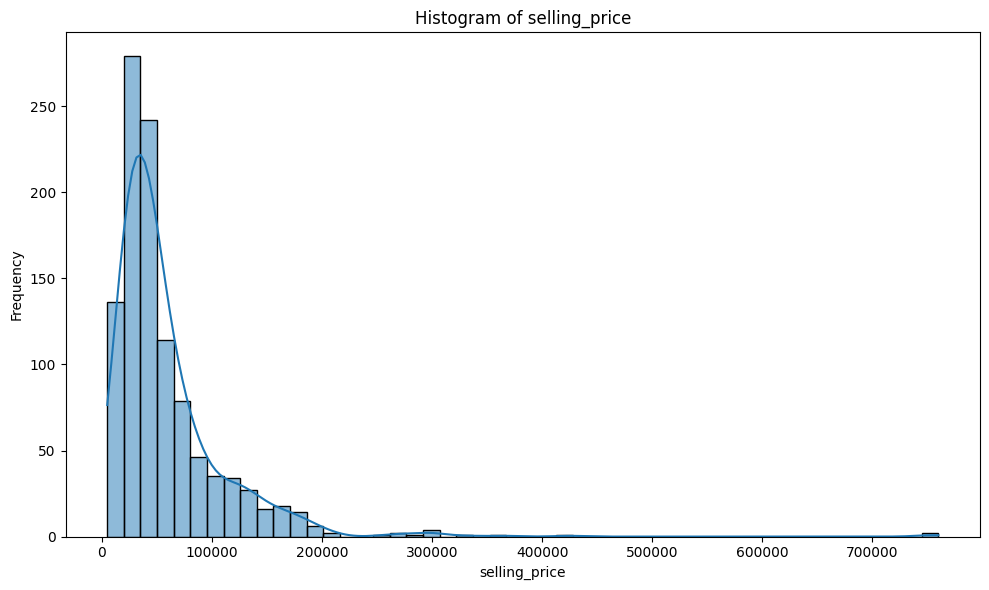

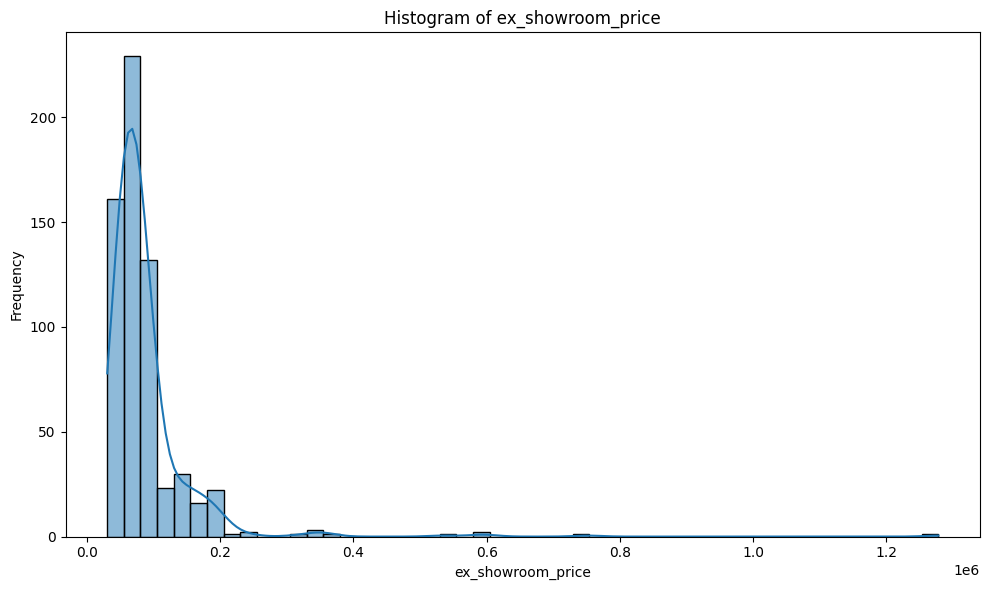

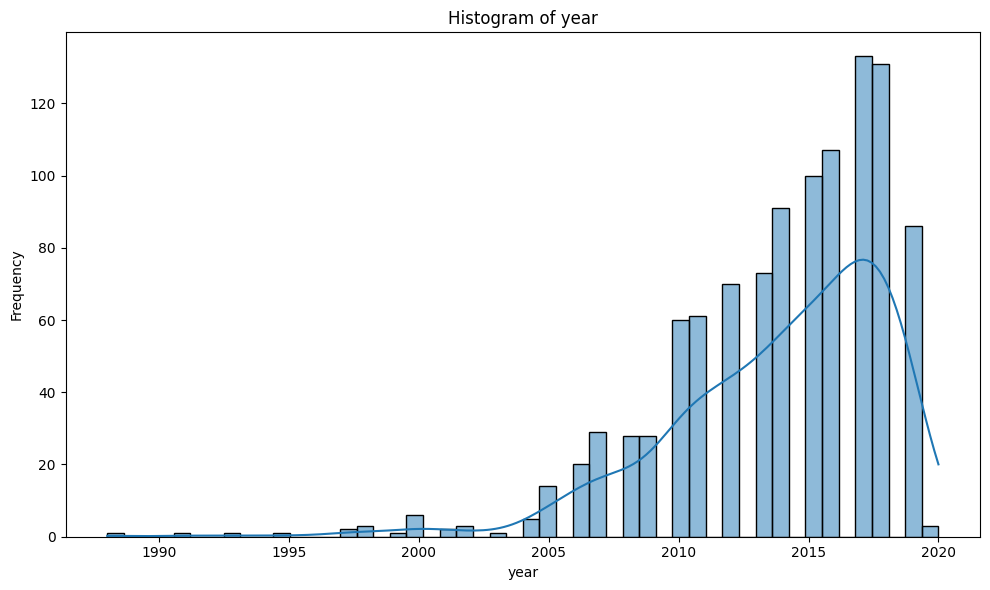

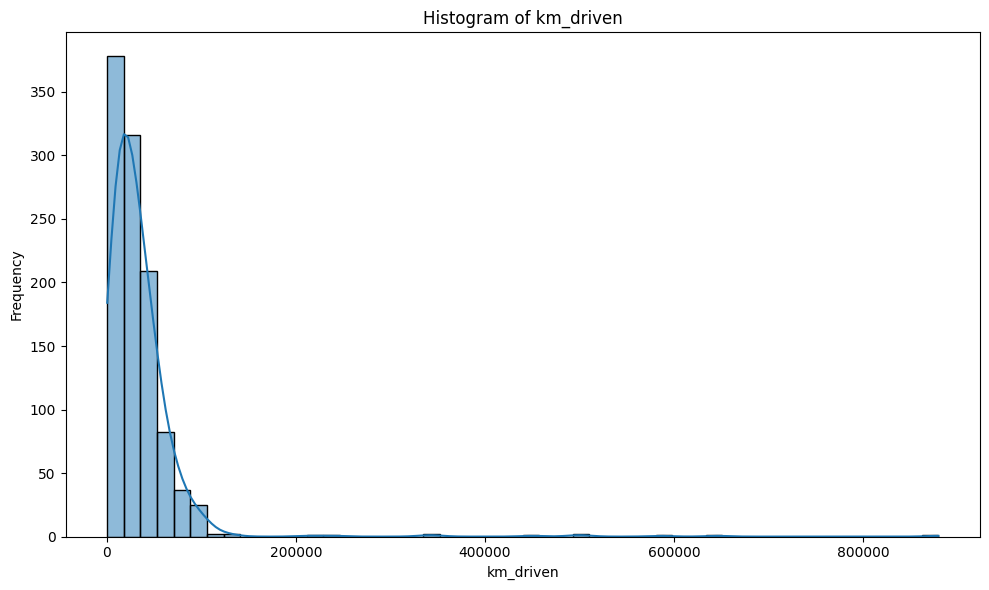

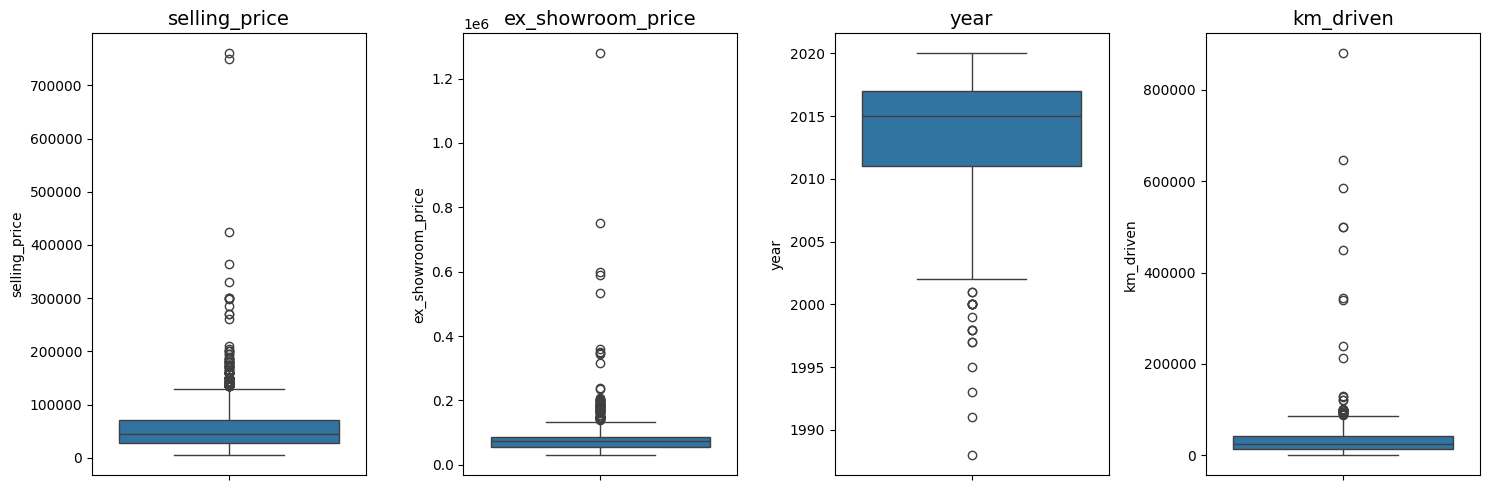

In [54]:
selected_cols = ['selling_price', 'ex_showroom_price', 'year', 'km_driven']

for column in selected_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=50)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Create boxplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(selected_cols), figsize=(15, 5))
for i, column in enumerate(selected_cols):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column, fontsize=14)
plt.tight_layout()
plt.show()

In [55]:
# removing name as not useful for prediction
df.drop(columns=['name'], inplace=True)

# converting to numerical value using one hot encoding
df = pd.get_dummies(df, columns=['seller_type', 'owner'], drop_first=True)
df.head()

,selling_price,year,km_driven,ex_showroom_price,seller_type_Individual,owner_2nd owner,owner_3rd owner,owner_4th owner
0,175000,2019,350,NaN,True,False,False,False
1,45000,2017,5650,NaN,True,False,False,False
2,150000,2018,12000,148114.0,True,False,False,False
3,65000,2015,23000,89643.0,True,False,False,False
4,20000,2011,21000,NaN,True,True,False,False


In [56]:
df.isnull().sum()

,0
selling_price,0
year,0
km_driven,0
ex_showroom_price,435
seller_type_Individual,0
owner_2nd owner,0
owner_3rd owner,0
owner_4th owner,0


Data Preprocessing

In [57]:
# handling missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [58]:
df.head(15)

,selling_price,year,km_driven,ex_showroom_price,seller_type_Individual,owner_2nd owner,owner_3rd owner,owner_4th owner
0,175000,2019,350,87958.714058,True,False,False,False
1,45000,2017,5650,87958.714058,True,False,False,False
2,150000,2018,12000,148114.000000,True,False,False,False
3,65000,2015,23000,89643.000000,True,False,False,False
4,20000,2011,21000,87958.714058,True,True,False,False
5,18000,2010,60000,53857.000000,True,False,False,False
6,78500,2018,17000,87719.000000,True,False,False,False
7,180000,2008,39000,87958.714058,True,True,False,False
8,30000,2010,32000,87958.714058,True,False,False,False
9,50000,2016,42000,60122.000000,True,False,False,False


In [59]:
df.isnull().sum()

,0
selling_price,0
year,0
km_driven,0
ex_showroom_price,0
seller_type_Individual,0
owner_2nd owner,0
owner_3rd owner,0
owner_4th owner,0


Outliers Checking
=

In [60]:

def process_outliers(df):
    df = df.copy()  # to avoid misplacement in original df
    outliers_count_before = {}

    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

        outliers_count_before[col] = ((df[col] < lower) | (df[col] > upper)).sum()

        if outliers_count_before[col] > 100:
            df.loc[:, col] = np.log1p(df[col])
            print(f"Feature '{col}' - Outliers: {outliers_count_before[col]}")
        else:
            df.loc[:, col] = np.clip(df[col], lower, upper)
            print(f"Feature '{col}' - Outliers: {outliers_count_before[col]}")

    outliers_count_after = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

        outliers_count_after[col] = ((df[col] < lower) | (df[col] > upper)).sum()

    print("\n Outlier Summary Before & After Handling:")
    for col in outliers_count_before:
        print(f"Feature: {col}, Before: {outliers_count_before[col]}, After: {outliers_count_after[col]}")

    return df

df = process_outliers(df)

Feature 'selling_price' - Outliers: 87
Feature 'year' - Outliers: 18
Feature 'km_driven' - Outliers: 39
Feature 'ex_showroom_price' - Outliers: 83

 Outlier Summary Before & After Handling:
Feature: selling_price, Before: 87, After: 0
Feature: year, Before: 18, After: 0
Feature: km_driven, Before: 39, After: 0
Feature: ex_showroom_price, Before: 83, After: 0


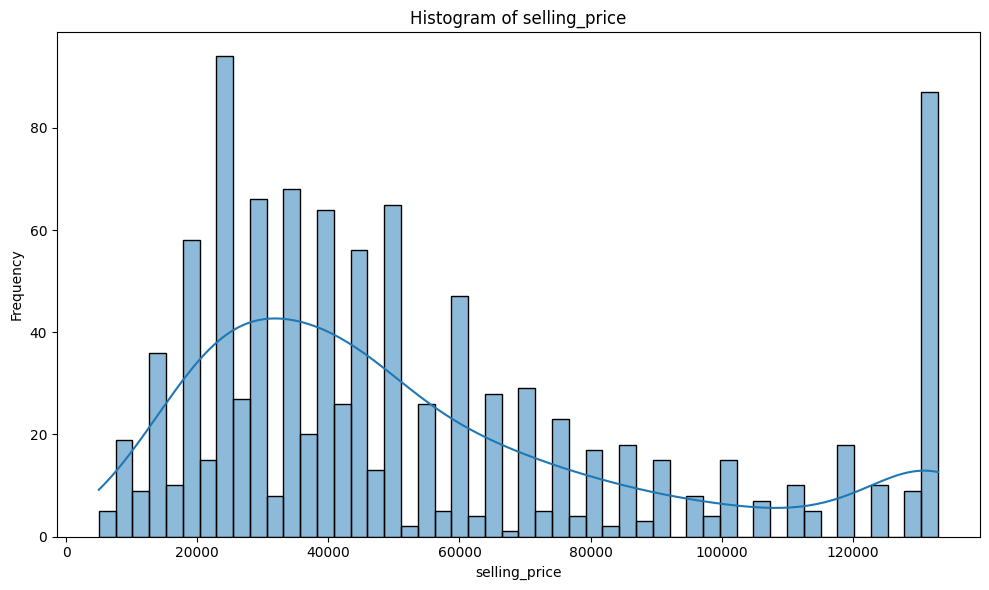

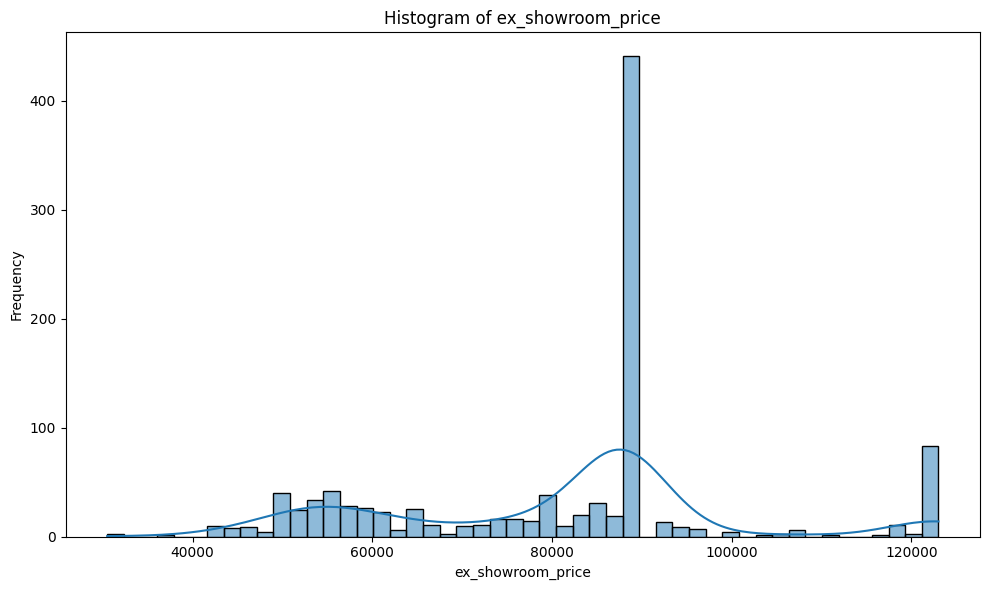

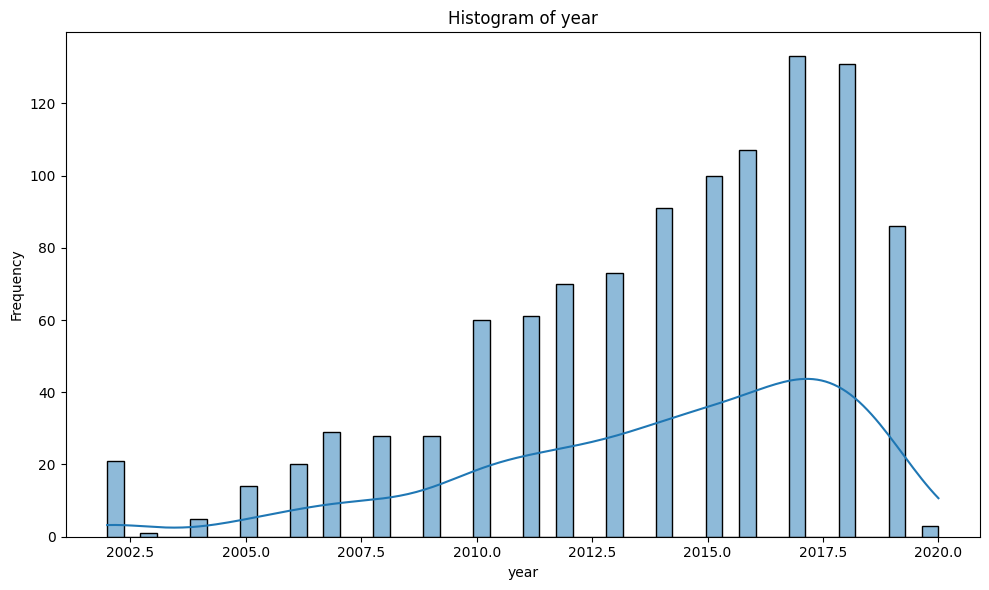

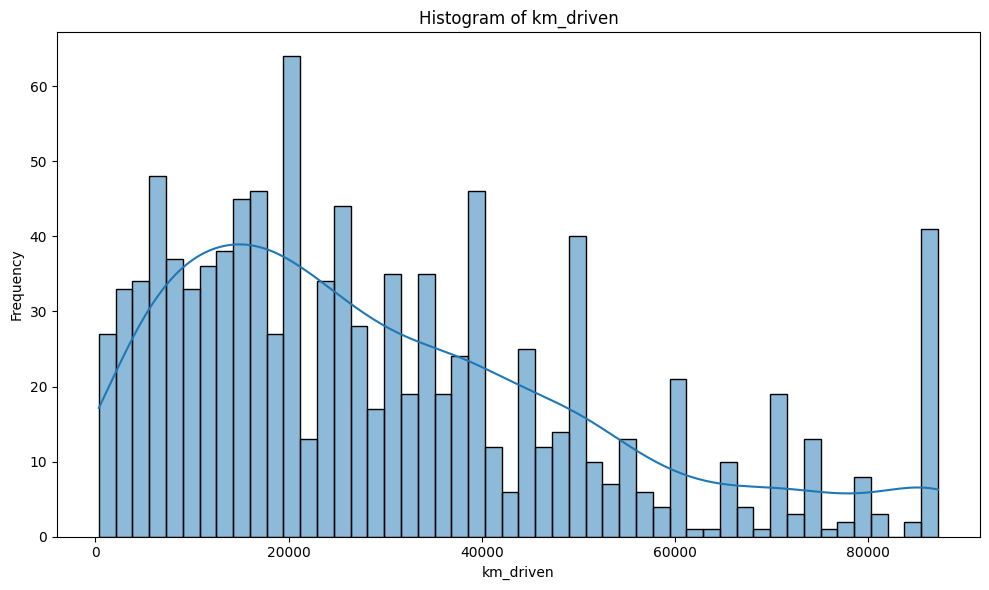

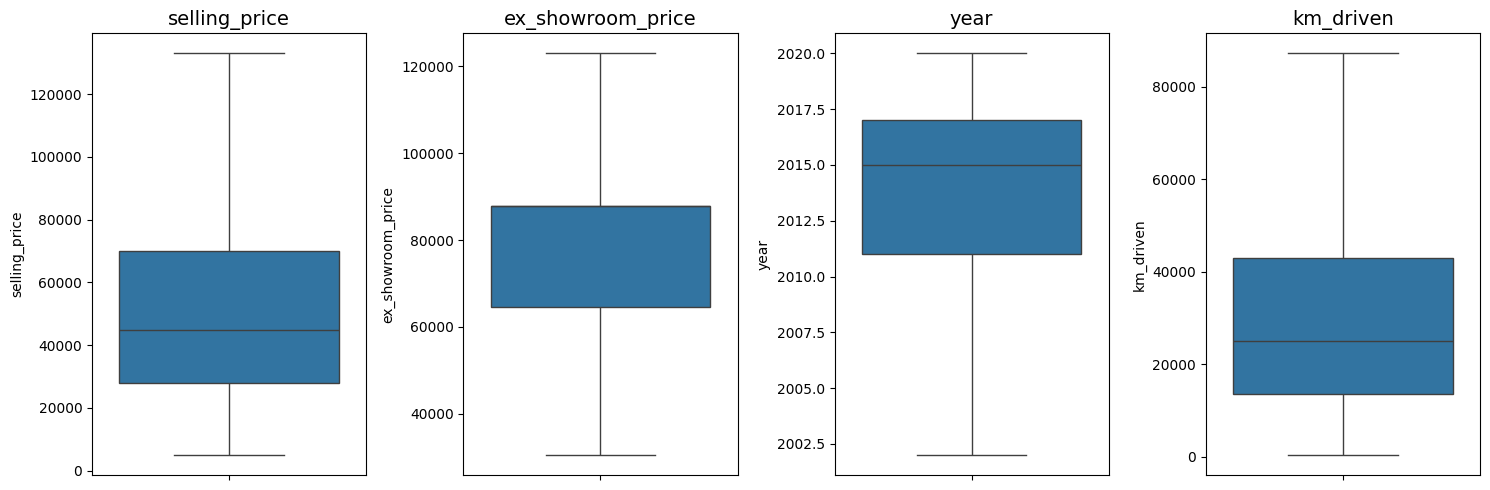

In [61]:
selected_cols = ['selling_price', 'ex_showroom_price', 'year', 'km_driven']

for column in selected_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=50)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

fig, axes = plt.subplots(nrows=1, ncols=len(selected_cols), figsize=(15, 5))
for i, column in enumerate(selected_cols):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column, fontsize=14)
plt.tight_layout()
plt.show()

Feature Selection

In [62]:
X = df.drop(columns=['selling_price'])
Y = df['selling_price']

In [63]:
# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# standarization
scaler = StandardScaler()
sc_X_train = scaler.fit_transform(X_train)  # Scale
sc_X_test = scaler.transform(X_test)


Linear Regression from scratch

In [64]:
def initialize_params(d):
    b = 0  # Bias
    w = np.zeros(d)  # Weights
    return b, w

def linear_function(b, w, X):
    return np.dot(X, w) + b

# cost function mse
def cost_function(Y_true, Y_pred):
    m = len(Y_true)
    return np.sum((Y_true - Y_pred) ** 2) / (2 * m)

def update_parameters(Y_true, Y_pred, X, b, w, alpha):
    m = len(Y_true)
    dw = -np.dot(X.T, (Y_true - Y_pred)) / m
    db = -np.mean(Y_true - Y_pred)
    w -= alpha * dw
    b -= alpha * db
    return b, w

In [65]:
# train function
def train_linear_regression(X_train, Y_train, n_iter=5000, alpha=0.01):
    b, w = initialize_params(X_train.shape[1])
    cost_history = []

    for i in range(n_iter):
        Y_hat = linear_function(b, w, X_train)
        cost_now = cost_function(Y_train, Y_hat)
        b, w = update_parameters(Y_train, Y_hat, X_train, b, w, alpha)
        cost_history.append(cost_now)

    return b, w, cost_history

In [66]:
# train
b, w, cost_history = train_linear_regression(sc_X_train, Y_train, n_iter=50000, alpha=0.0001)
print(cost_history[-10:])

[242338817.07175303, 242338788.7451349, 242338760.4227251, 242338732.10452282, 242338703.7905275, 242338675.4807383, 242338647.17515454, 242338618.8737755, 242338590.5766006, 242338562.28362903]


In [67]:
# prediction
Y_train_pred_scratch = linear_function(b, w, sc_X_train)
Y_test_pred_scratch = linear_function(b, w, sc_X_test)

In [68]:
# for train set
train_mse_scratch = mean_squared_error(Y_train, Y_train_pred_scratch)
train_r2_scratch = r2_score(Y_train, Y_train_pred_scratch)

# for test set
test_mse_scratch = mean_squared_error(Y_test, Y_test_pred_scratch)
test_r2_scratch = r2_score(Y_test, Y_test_pred_scratch)

print(f"Training Set: MSE: {train_mse_scratch:.4f}, R2: {train_r2_scratch:.4f}")
print(f"Test Set: MSE: {test_mse_scratch:.4f}, R2: {test_r2_scratch:.4f}")

Training Set: MSE: 484677067.9897, R2: 0.6119
Test Set: MSE: 441419795.6825, R2: 0.6620


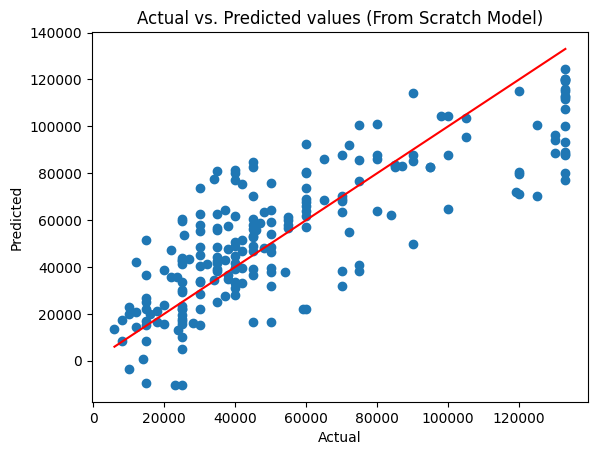

In [69]:
plt.scatter(Y_test, Y_test_pred_scratch)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted values (From Scratch Model)')
plt.show()

Ridge Regression using Sklearn

In [70]:
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)

Y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge:.4f}, R2: {r2_ridge:.4f}")

Ridge Regression - MSE: 441804918.8539, R2: 0.6617


Decision Tree Regression

In [71]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, Y_train)

# predicting
Y_pred_tree = tree_model.predict(X_test)

# evaluating Decision Tree model
mse_tree = mean_squared_error(Y_test, Y_pred_tree)
r2_tree = r2_score(Y_test, Y_pred_tree)
print(f"Decision Tree - MSE: {mse_tree:.4f}, R2: {r2_tree:.4f}")

Decision Tree - MSE: 750242268.9155, R2: 0.4255


              Model           MSE        R²
0  Ridge Regression  4.418049e+08  0.661699
1     Decision Tree  7.502423e+08  0.425521


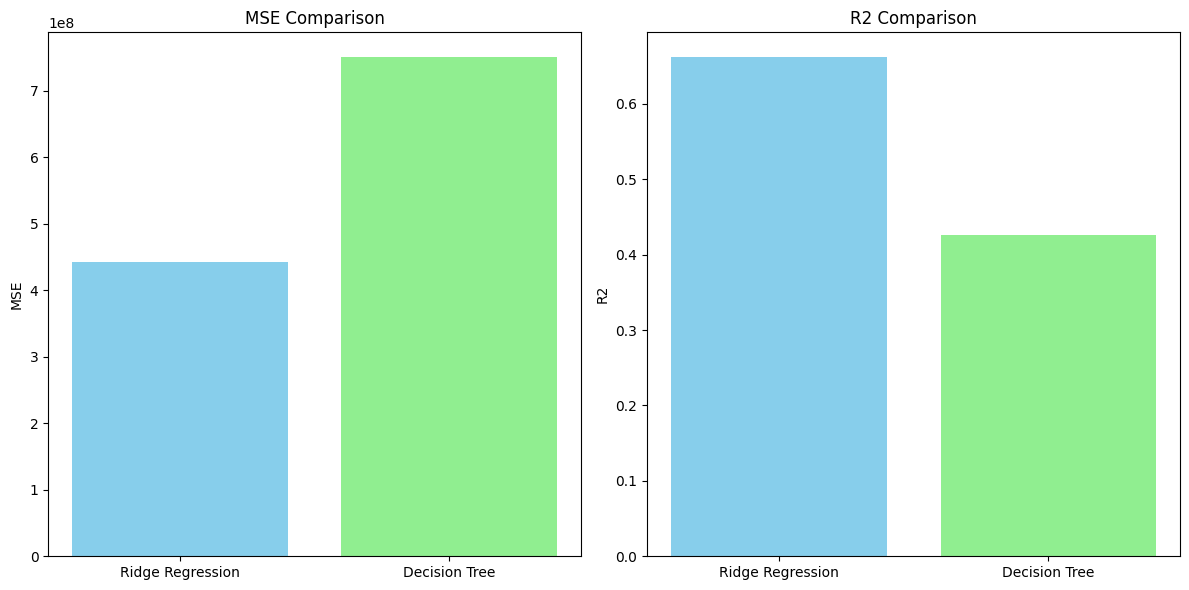

In [72]:
comparison_df = pd.DataFrame({
    'Model': ['Ridge Regression', 'Decision Tree'],
    'MSE': [mse_ridge, mse_tree],
    'R²': [r2_ridge, r2_tree]
})

print(comparison_df)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(comparison_df['Model'], comparison_df['MSE'], color=['skyblue', 'lightgreen'])
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('MSE')

ax[1].bar(comparison_df['Model'], comparison_df['R²'], color=['skyblue', 'lightgreen'])
ax[1].set_title('R2 Comparison')
ax[1].set_ylabel('R2')
plt.tight_layout()
plt.show()

In [73]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# gridsearchcv for hyperparameter tuning
ridge_grid = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, Y_train)

best_ridge_params = ridge_grid.best_params_
print(f"Best Ridge Parameters: {best_ridge_params}")

param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='neg_mean_squared_error')
tree_grid.fit(X_train, Y_train)

best_tree_params = tree_grid.best_params_
print(f"Best Decision Tree Parameters: {best_tree_params}")


Best Ridge Parameters: {'alpha': 100}
Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [74]:
# train ridge with best hyperparameters
ridge_best = Ridge(**best_ridge_params)
ridge_best.fit(X_train, Y_train)

# pred and evaluate with best ridge model
ridge_preds_best = ridge_best.predict(X_test)
ridge_mse_best = mean_squared_error(Y_test, ridge_preds_best)
ridge_r2_best = r2_score(Y_test, ridge_preds_best)

print(f"Best Ridge Regression Test MSE: {ridge_mse_best:.4f}")
print(f"Best Ridge Regression Test R2: {ridge_r2_best:.4f}")

# train dec tree with best hyperparameters
tree_best = DecisionTreeRegressor(**best_tree_params, random_state=42)
tree_best.fit(X_train, Y_train)

# pred and evaluate with best dec tree model
tree_preds_best = tree_best.predict(X_test)
tree_mse_best = mean_squared_error(Y_test, tree_preds_best)
tree_r2_best = r2_score(Y_test, tree_preds_best)

print(f"Best Decision Tree Test MSE: {tree_mse_best:.4f}")
print(f"Best Decision Tree Test R2: {tree_r2_best:.4f}")

Best Ridge Regression Test MSE: 446446881.6707
Best Ridge Regression Test R2: 0.6581
Best Decision Tree Test MSE: 374008154.2249
Best Decision Tree Test R2: 0.7136


Feature Selection with RFE

In [75]:
select_ridge = SelectKBest(score_func=f_regression, k=5)
X_train_select_ridge = select_ridge.fit_transform(X_train, Y_train)
X_test_select_ridge = select_ridge.transform(X_test)

ridge_selected_features = X.columns[select_ridge.get_support()]
print("\nBest Subset of Features for Ridge:", ridge_selected_features)


Best Subset of Features for Ridge: Index(['year', 'km_driven', 'ex_showroom_price', 'owner_2nd owner',
       'owner_3rd owner'],
      dtype='object')


In [76]:
ridge_best_final = Ridge(**best_ridge_params)
ridge_best_final.fit(X_train[ridge_selected_features], Y_train)

ridge_preds_final = ridge_best_final.predict(X_test[ridge_selected_features])
ridge_mse_final = mean_squared_error(Y_test, ridge_preds_final)
ridge_r2_final = r2_score(Y_test, ridge_preds_final)

print(f"Final Ridge Model Test MSE: {ridge_mse_final:.4f}")
print(f"Final Ridge Model Test R2: {ridge_r2_final:.4f}")

Final Ridge Model Test MSE: 446453369.9851
Final Ridge Model Test R2: 0.6581


In [77]:
rfe_tree = RFE(estimator=DecisionTreeRegressor(**best_tree_params, random_state=42), n_features_to_select=5)
X_train_rfe_tree = rfe_tree.fit_transform(X_train, Y_train)
X_test_rfe_tree = rfe_tree.transform(X_test)

tree_ranking = rfe_tree.ranking_

print("\nDecision Tree Model Feature Rankings:")
for feature, rank in zip(X.columns, tree_ranking):
    print(f"{feature}: Rank {rank}")

#select rank 1
tree_selected_features = [X.columns[i] for i in range(len(tree_ranking)) if tree_ranking[i] == 1]
print("\nBest Subset of Features for Decision Tree:", tree_selected_features)


Decision Tree Model Feature Rankings:
year: Rank 1
km_driven: Rank 1
ex_showroom_price: Rank 1
seller_type_Individual: Rank 3
owner_2nd owner: Rank 2
owner_3rd owner: Rank 1
owner_4th owner: Rank 1

Best Subset of Features for Decision Tree: ['year', 'km_driven', 'ex_showroom_price', 'owner_3rd owner', 'owner_4th owner']


In [78]:
tree_best_final = DecisionTreeRegressor(**best_tree_params, random_state=42)
tree_best_final.fit(X_train[tree_selected_features], Y_train)

tree_preds_final = tree_best_final.predict(X_test[tree_selected_features])
tree_mse_final = mean_squared_error(Y_test, tree_preds_final)
tree_r2_final = r2_score(Y_test, tree_preds_final)

print(f"Final Decision Tree Model Test MSE: {tree_mse_final:.4f}")
print(f"Final Decision Tree Model Test R²: {tree_r2_final:.4f}")

Final Decision Tree Model Test MSE: 374008154.2249
Final Decision Tree Model Test R²: 0.7136


Comparing the models done with sklearn Knn and decision tree

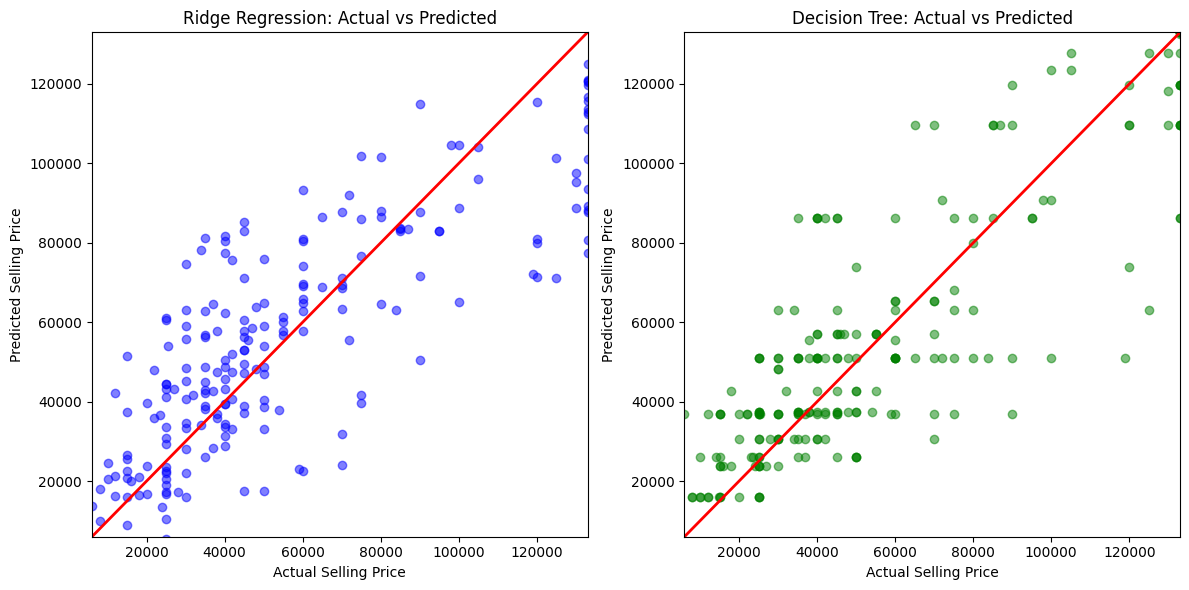

In [79]:
plt.figure(figsize=(12, 6))

# ridge: actual vs prediction
plt.subplot(1, 2, 1)
plt.scatter(Y_test, ridge_preds_final, color='blue', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.xlim([min(Y_test), max(Y_test)])
plt.ylim([min(Y_test), max(Y_test)])

# decision tree: actual vs prediction
plt.subplot(1, 2, 2)
plt.scatter(Y_test, tree_preds_final, color='green', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.xlim([min(Y_test), max(Y_test)])
plt.ylim([min(Y_test), max(Y_test)])

plt.tight_layout()
plt.show()

In [80]:
#checking best model on mse
if ridge_mse_final < tree_mse_final:
    print("\nRidge Regression performed better than Decision Tree based on MSE.")
    print(f"Ridge MSE: {ridge_mse_final:.4f}, Decision Tree MSE: {tree_mse_final:.4f}")
elif tree_mse_final < ridge_mse_final:
    print("\nDecision Tree performed better than Ridge Regression based on MSE.")
    print(f"Decision Tree MSE: {tree_mse_final:.4f}, Ridge MSE: {ridge_mse_final:.4f}")
else:
    print("\nRidge Regression and Decision Tree performed equally well based on MSE.")
    print(f"Ridge MSE: {ridge_mse_final:.4f}, Decision Tree MSE: {tree_mse_final:.4f}")

# checking best model on r2
if ridge_r2_final > tree_r2_final:
    print("Ridge Regression performed better than Decision Tree based on R-squared.")
    print(f"Ridge R-squared: {ridge_r2_final:.4f}, Decision Tree R-squared: {tree_r2_final:.4f}")
elif tree_r2_final > ridge_r2_final:
    print("Decision Tree performed better than Ridge Regression based on R-squared.")
    print(f"Decision Tree R-squared: {tree_r2_final:.4f}, Ridge R-squared: {ridge_r2_final:.4f}")
else:
    print("Ridge Regression and Decision Tree performed equally well based on R-squared.")
    print(f"Ridge R-squared: {ridge_r2_final:.4f}, Decision Tree R-squared: {tree_r2_final:.4f}")


Decision Tree performed better than Ridge Regression based on MSE.
Decision Tree MSE: 374008154.2249, Ridge MSE: 446453369.9851
Decision Tree performed better than Ridge Regression based on R-squared.
Decision Tree R-squared: 0.7136, Ridge R-squared: 0.6581


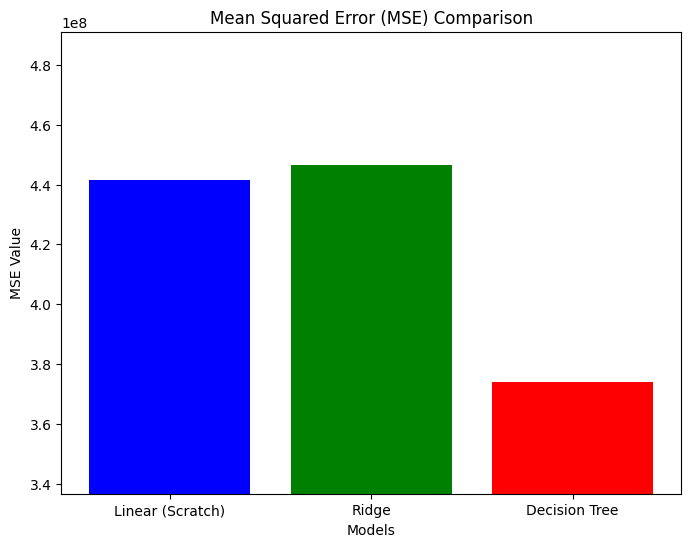

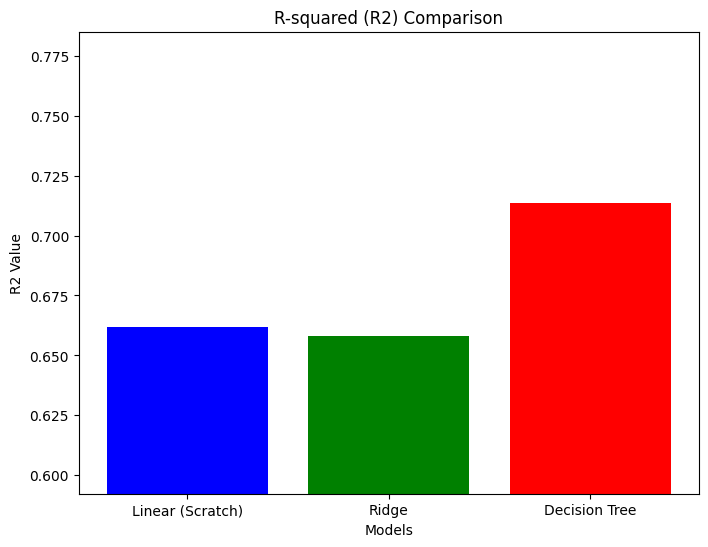

In [83]:
# Predictions
y_pred_scratch = linear_function(b, w, sc_X_test)
y_pred_ridge = ridge_best.predict(X_test)
y_pred_tree = tree_best_final.predict(X_test[tree_selected_features])

# for test set
mse_scratch = mean_squared_error(Y_test, Y_test_pred_scratch)
r2_scratch = r2_score(Y_test, Y_test_pred_scratch)

mse_ridge = mean_squared_error(Y_test, ridge_preds_best)
r2_ridge = r2_score(Y_test, ridge_preds_best)

mse_tree = mean_squared_error(Y_test, tree_preds_final)
r2_tree =  r2_score(Y_test, tree_preds_final)

# Prepare data for plotting
model_names = ['Linear (Scratch)', 'Ridge', 'Decision Tree']
mse_values = [mse_scratch, mse_ridge, mse_tree]
r2_values = [r2_scratch, r2_ridge, r2_tree]
# mae_values = [mae_scratch, mae_ridge, mae_tree]

# Plotting Function
def plot_bar_graph(values, model_names, title, ylabel):
    plt.figure(figsize=(8, 6))
    plt.bar(model_names, values, color=['blue', 'green', 'red'])
    plt.xlabel("Models")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim(min(values) * 0.9, max(values) * 1.1)  # Adjust y-axis limits
    plt.show()

# Generate plots
plot_bar_graph(mse_values, model_names, 'Mean Squared Error (MSE) Comparison', 'MSE Value')
plot_bar_graph(r2_values, model_names, 'R-squared (R2) Comparison', 'R2 Value')